In [96]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

In [97]:
import torch

In [98]:
# Writing Math equation in Jupyter Notebook
# https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214

a=2.0<br>
b=3.0<br>
c=a * b<br>
$\partial{c} / \partial{a} = 3.0$<br>
$\partial{c} / \partial{b} = 2.0$

In [99]:
# JUST TO REMIND

a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

c = a * b
print("c = {}".format(c))

c.backward() # computes gradient for a and b (which has requires_grad=True)

print("a gradient = {}, b gradient = {}".format(a.grad, b.grad))


c = 6.0
a gradient = 3.0, b gradient = 2.0


In [100]:
# The wrapper "with torch.no_grad()" temporarily set all the requires_grad flag to false inside its context
# CLASS torch.no_grad -> Context-manager that disabled gradient calculation.

x = torch.randn(3, requires_grad=True)
print("requires_grad of x = {}".format(x.requires_grad)) # True
print("requires_grad of x ** 2 = {}".format((x ** 2).requires_grad)) # True

# the "required_grad" flag of x is temporarily removed
# Only in the context of with !
with torch.no_grad():
    print("requires_grad of x ** 2 = {}".format((x ** 2).requires_grad)) 
    
    
# Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 
# It will reduce memory consumption for computations that would otherwise have requires_grad=True.
# In this mode, the result of every computation will have requires_grad=False, even when the inputs have requires_grad=True.
   
print("requires_grad of x ** 2 = {}".format((x ** 2).requires_grad)) # outside of "with context" -> True

requires_grad of x = True
requires_grad of x ** 2 = True
requires_grad of x ** 2 = False
requires_grad of x ** 2 = True


In [101]:
# The same by using a global function : torch.set_grad_enabled

torch.set_grad_enabled(False)

x = torch.randn(3, requires_grad=True)
print("requires_grad of x = {}".format(x.requires_grad)) # True
print("requires_grad of x ** 2 = {}".format((x ** 2).requires_grad)) # False

torch.set_grad_enabled(True)

print("requires_grad of x = {}".format(x.requires_grad)) # True
print("requires_grad of x ** 2 = {}".format((x ** 2).requires_grad)) # True


requires_grad of x = True
requires_grad of x ** 2 = False
requires_grad of x = True
requires_grad of x ** 2 = True


In [102]:
# torch.max
# The default behavior is to return a single element and an index, corresponding to the global maximum element.

p = torch.randn([2, 3])
print(p)

max_element = torch.max(p)
print(max_element)

# use item() function to get the scalar value (the tensor holds a single value)
print(max_element.item())

tensor([[ 0.0951,  0.4758, -0.4451],
        [ 0.8208, -1.1656,  1.2149]])
tensor(1.2149)
1.2149074077606201


In [103]:
### Use torch.max() along a dimension
# This returns a tuple, max_elements and max_indices.

# max_elements, max_indices = torch.max(input_tensor, dim)
# max_elements -> All the maximum elements of the Tensor.
# max_indices -> Indices corresponding to the maximum elements.

p = torch.randn([2, 3])
print(p)
 
# Get the maximum along dim = 0 (axis = 0) - Column
max_elements, max_idxs = torch.max(p, dim=0)
print("by column max elem = {}, size = {}".format(max_elements, max_elements.size()))
print("by column index of max elem = {}".format(max_idxs))

print("-----------------------------------------")

# Get the maximum along dim = 1 (axis = 1) - row
max_elements, max_idxs = torch.max(p, dim=1)
print("by row max elem = {}, size = {}".format(max_elements, max_elements.size()))
print("by row index of max elem = {}".format(max_idxs))

tensor([[-1.4571, -0.0718, -0.2187],
        [ 0.1641, -1.1333,  1.5883]])
by column max elem = tensor([ 0.1641, -0.0718,  1.5883]), size = torch.Size([3])
by column index of max elem = tensor([1, 0, 1])
-----------------------------------------
by row max elem = tensor([-0.0718,  1.5883]), size = torch.Size([2])
by row index of max elem = tensor([1, 2])


In [104]:
# torch.manual_seed()
# It will set the seed of the random number generator to a fixed value, 
# the results will be reproducible.

# Execute that code multiple times and you will get the same value
torch.manual_seed(5)
print(torch.rand(2))


tensor([0.8303, 0.1261])


In [105]:
# nn.Identity() is a module that forwards the input as such.

import torch
import torch.nn as nn

net = nn.Identity()
p = torch.randn([2, 3])

print("p =",p)

output = net.forward(p)

print("outpout =",output)

p = tensor([[-0.0580,  0.9444, -0.3130],
        [ 0.7217,  0.7830, -1.0576]])
outpout = tensor([[-0.0580,  0.9444, -0.3130],
        [ 0.7217,  0.7830, -1.0576]])


In [12]:
# numpy reshape

import numpy as np

# z is an array (matrix) of 3 lines and 4 columns = 12 elements
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
print(z)
print(z.shape) # print shape of z = (3, 4), 3 lines and 4 columns

print("----------------------------------------------")

# reshape (change matrix dimension) to 4 lines and 3 columns
# of course the new shape have to be compatible with the original shape !
u = z.reshape(4, 3)
print(u)

print("----------------------------------------------")

# reshape with -1 : it is an unknown dimension and we want numpy to figure it out.
v = z.reshape(-1)
print(v)

print("----------------------------------------------")

# reshape(-1, 1) : row dimension is unknown, column is 1
w = z.reshape(-1, 1)
print(w)

print("----------------------------------------------")

# reshape(-1, 3) : row dimension is unknown, column is 3
x = z.reshape(-1, 3)
print(x)

print("----------------------------------------------")

# reshape(2, -1) : row is 2, column dimension is unknown
y = z.reshape(2, -1)
print(y)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
----------------------------------------------
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
----------------------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
----------------------------------------------
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
----------------------------------------------
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
----------------------------------------------
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


a = [-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ]
b = tensor([-0.9999, -0.9996, -0.9984, -0.9934, -0.9728, -0.8914, -0.6134,  0.0000,
         0.6134,  0.8914,  0.9728,  0.9934,  0.9984,  0.9996,  0.9999])


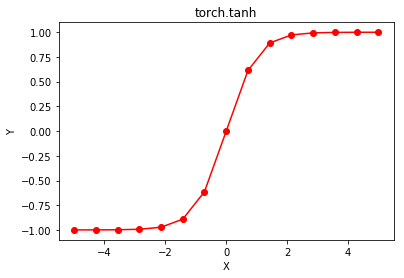

In [23]:
# torch tanh
# The hyperbolic tangent function.

# The hyperbolic tangent function outputs in the range (-1, 1).

# Importing the PyTorch library 
import torch 
  
# Importing the NumPy library 
import numpy as np 
  
# Importing the matplotlib.pylot function 
import matplotlib.pyplot as plt 
  
# A vector of size 15 with values from -5 to 5 
a = np.linspace(-5, 5, 15) 
print("a = {}".format(a))
  
# Applying the hyperbolic tangent function and 
# storing the result in 'b' 
b = torch.tanh(torch.FloatTensor(a)) 
print("b = {}".format(b))
  
# Plotting 
plt.plot(a, b.numpy(), color = 'red', marker = "o")  
plt.title("torch.tanh")  
plt.xlabel("X")  
plt.ylabel("Y")  
  
plt.show() 